# Queue Estimation on LLMs

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import re

In [2]:
def title_from_exp_str(s):
    # Replace underscores with spaces
    s = s.replace('_', ' ')
    
    # Insert '=' between letters and numbers
    s = re.sub(r'([a-zA-Z])(\d+)', r'\1=\2', s)
    
    # Add commas to large numbers (1,000 and above)
    s = re.sub(r'(\d{1,3})(?=(\d{3})+(?!\d))', r'\1,', s)
    
    return s


In [3]:
data_dir = "data_6Nov"

## C=1 w=1_000_000 t=100 n=60 d=5

In [4]:
C=1
w=1_000_000
t=100
n=60
d=5

In [5]:
lam = float(1_000_000/w)

In [6]:
exp_str = f'C{C}_w{w}_t{t}_n{n}_d{d}'

In [7]:
q_fname = f'{data_dir}/queue_size_{exp_str}.csv'
r_fname = f'{data_dir}/round_trips_{exp_str}.csv'

In [8]:
q_df = pd.read_csv(q_fname, parse_dates=['timestamp'])
q_df.index = q_df.timestamp
r_df = pd.read_csv(r_fname, names=['rtt'])

In [9]:
q_df['in_service'] = q_df.queue_size + q_df.batch_current_size

In [10]:
mu_hat = -1/d * q_df['in_service'].diff() + lam
mu_hat = mu_hat.dropna()

In [11]:
mean_in_service = q_df['in_service'].mean()

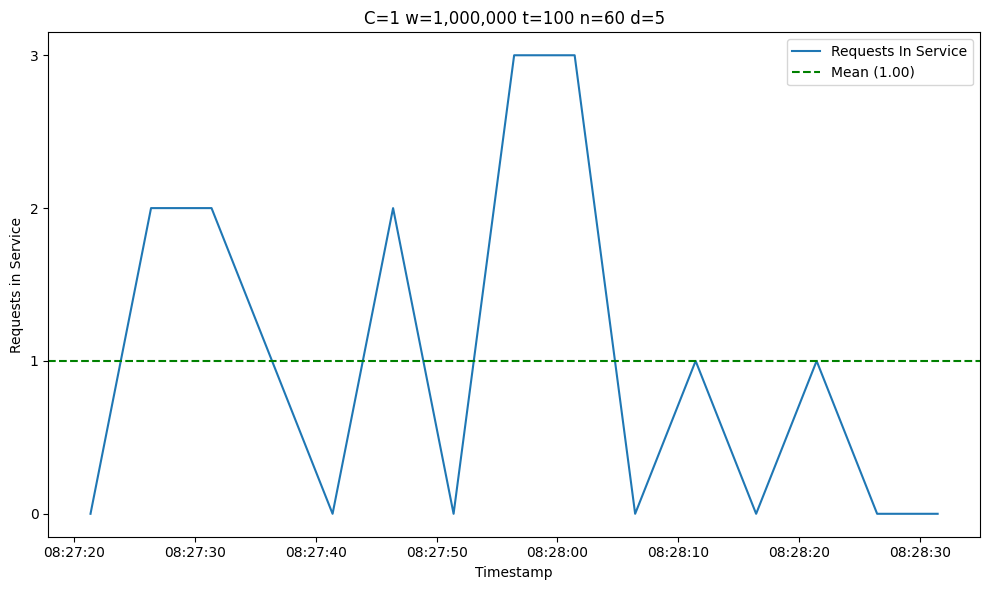

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(q_df.index, q_df['in_service'], label='Requests In Service')
plt.axhline(y=mean_in_service, color='green', linestyle='--', label=f'Mean ({mean_in_service:.2f})')

plt.xlabel('Timestamp')
plt.ylabel('Requests in Service')
plt.title(title_from_exp_str(exp_str))
plt.yticks(range(int(q_df['in_service'].min()), int(q_df['in_service'].max()) + 1))
plt.legend()
plt.tight_layout()

In [13]:
mean_request_rate = q_df['request_rate'].mean()

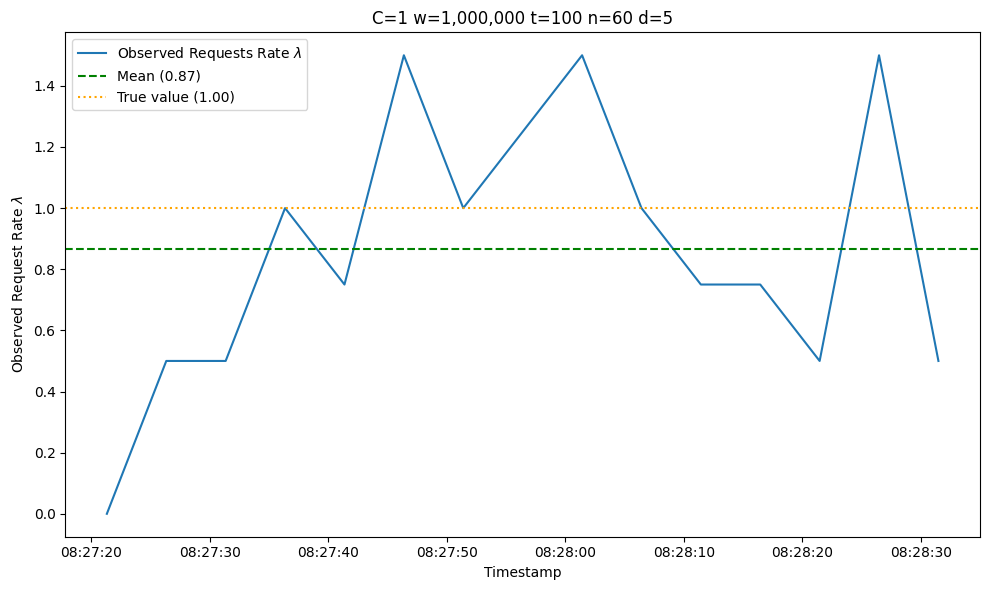

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(q_df.index, q_df['request_rate'], label=r'Observed Requests Rate $\lambda$')
plt.axhline(y=mean_request_rate, color='green', linestyle='--', label=f'Mean ({mean_request_rate:.2f})')
plt.axhline(y=lam, color='orange', linestyle=':', label=f'True value ({lam:.2f})')

plt.xlabel('Timestamp')
plt.ylabel(r'Observed Request Rate $\lambda$')
plt.title(title_from_exp_str(exp_str))
plt.legend()
plt.tight_layout()

In [15]:
mean_mu_hat = mu_hat.mean()

In [16]:
rtt_mean = r_df['rtt'].mean()
per_req_mean = 1 / rtt_mean

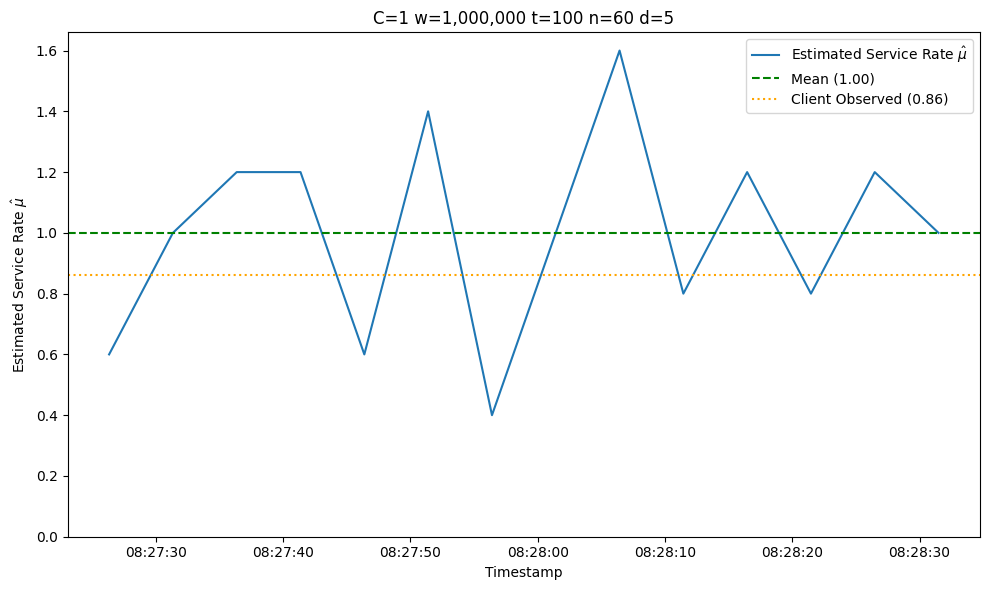

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(mu_hat, label=r'Estimated Service Rate $\hat{\mu}$')
plt.axhline(y=mean_mu_hat, color='green', linestyle='--', label=f'Mean ({mean_mu_hat:.2f})')
plt.axhline(y=per_req_mean, color='orange', linestyle=':', label=f'Client Observed ({per_req_mean:.2f})')
plt.ylim((0,None))
plt.xlabel('Timestamp')
plt.ylabel(r'Estimated Service Rate $\hat{\mu}$')
plt.title(title_from_exp_str(exp_str))
plt.legend()
plt.tight_layout()

# C=1 w=250_000 t=100 n=240 d=5

In [18]:
C=1
w=250_000
t=100
n=240
d=5

In [19]:
lam = float(1_000_000/w)

In [20]:
exp_str = f'C{C}_w{w}_t{t}_n{n}_d{d}'

In [21]:
q_fname = f'{data_dir}/queue_size_{exp_str}.csv'
r_fname = f'{data_dir}/round_trips_{exp_str}.csv'

In [22]:
q_df = pd.read_csv(q_fname, parse_dates=['timestamp'])
q_df.index = q_df.timestamp
r_df = pd.read_csv(r_fname, names=['rtt'])

In [23]:
q_df['in_service'] = q_df.queue_size + q_df.batch_current_size

In [24]:
mu_hat = -1/d * q_df['in_service'].diff() + lam
mu_hat = mu_hat.dropna()

In [25]:
mean_in_service = q_df['in_service'].mean()

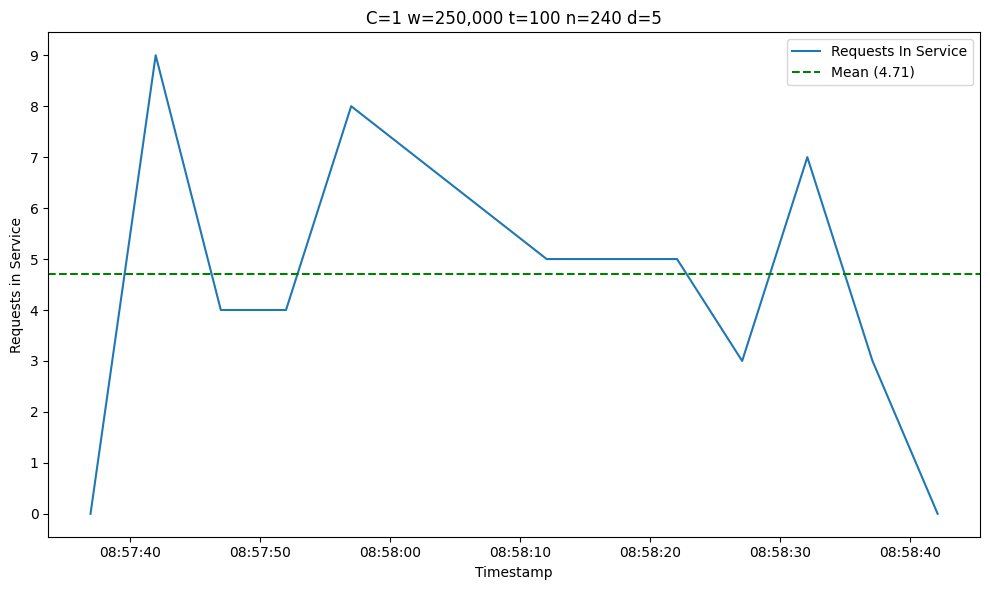

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(q_df.index, q_df['in_service'], label='Requests In Service')
plt.axhline(y=mean_in_service, color='green', linestyle='--', label=f'Mean ({mean_in_service:.2f})')

plt.xlabel('Timestamp')
plt.ylabel('Requests in Service')
plt.title(title_from_exp_str(exp_str))
plt.yticks(range(int(q_df['in_service'].min()), int(q_df['in_service'].max()) + 1))
plt.legend()
plt.tight_layout()

In [27]:
mean_request_rate = q_df['request_rate'].mean()

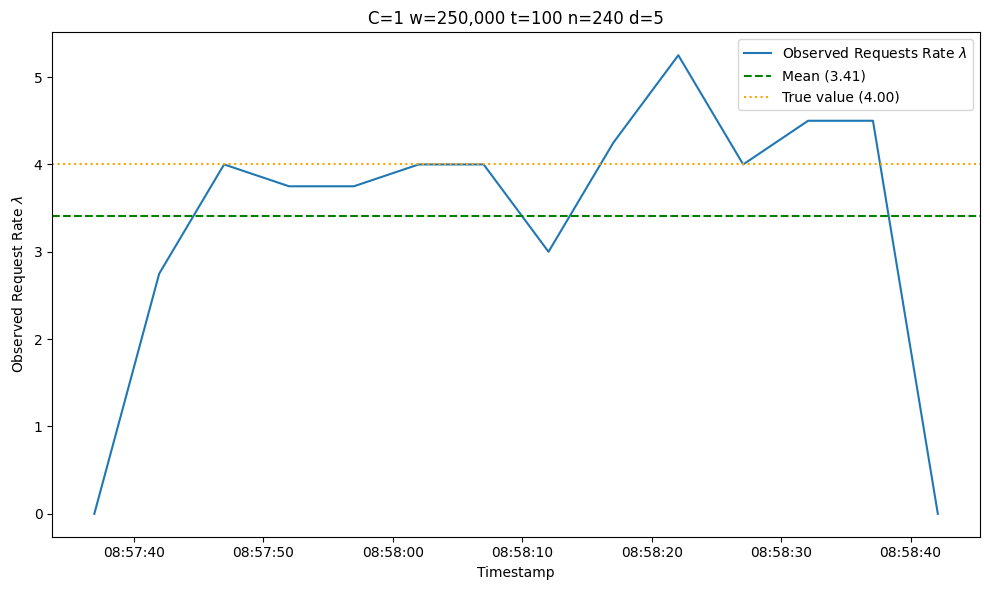

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(q_df.index, q_df['request_rate'], label=r'Observed Requests Rate $\lambda$')
plt.axhline(y=mean_request_rate, color='green', linestyle='--', label=f'Mean ({mean_request_rate:.2f})')
plt.axhline(y=lam, color='orange', linestyle=':', label=f'True value ({lam:.2f})')

plt.xlabel('Timestamp')
plt.ylabel(r'Observed Request Rate $\lambda$')
plt.title(title_from_exp_str(exp_str))
plt.legend()
plt.tight_layout()

In [29]:
mean_mu_hat = mu_hat.mean()

In [30]:
rtt_mean = r_df['rtt'].mean()
per_req_mean = 1 / rtt_mean

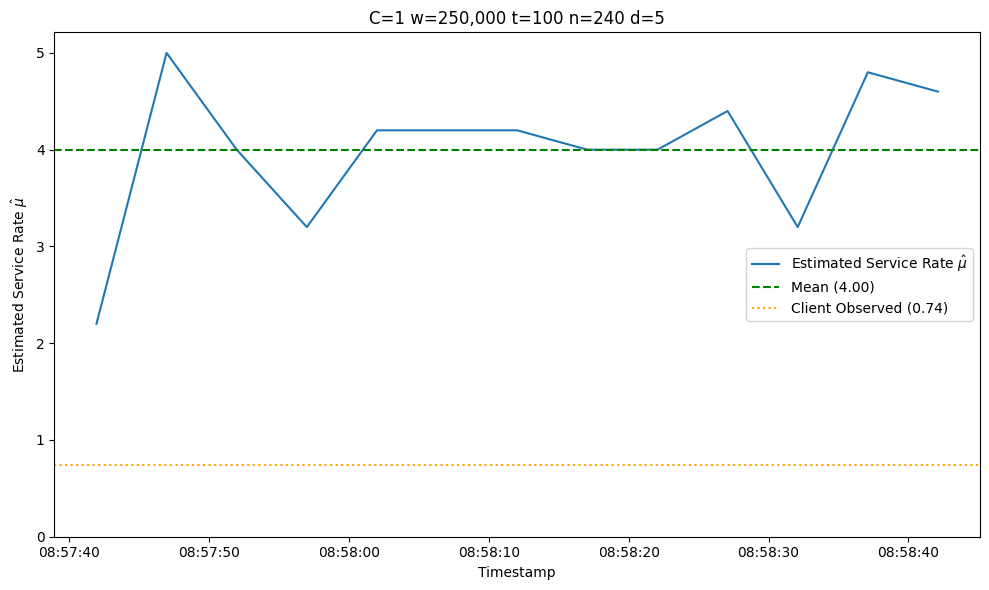

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(mu_hat, label=r'Estimated Service Rate $\hat{\mu}$')
plt.axhline(y=mean_mu_hat, color='green', linestyle='--', label=f'Mean ({mean_mu_hat:.2f})')
plt.axhline(y=per_req_mean, color='orange', linestyle=':', label=f'Client Observed ({per_req_mean:.2f})')
plt.ylim((0,None))
plt.xlabel('Timestamp')
plt.ylabel(r'Estimated Service Rate $\hat{\mu}$')
plt.title(title_from_exp_str(exp_str))
plt.legend()
plt.tight_layout()

In [32]:
rtt_mean = r_df['rtt'].mean()
per_req_mean = 1 / rtt_mean

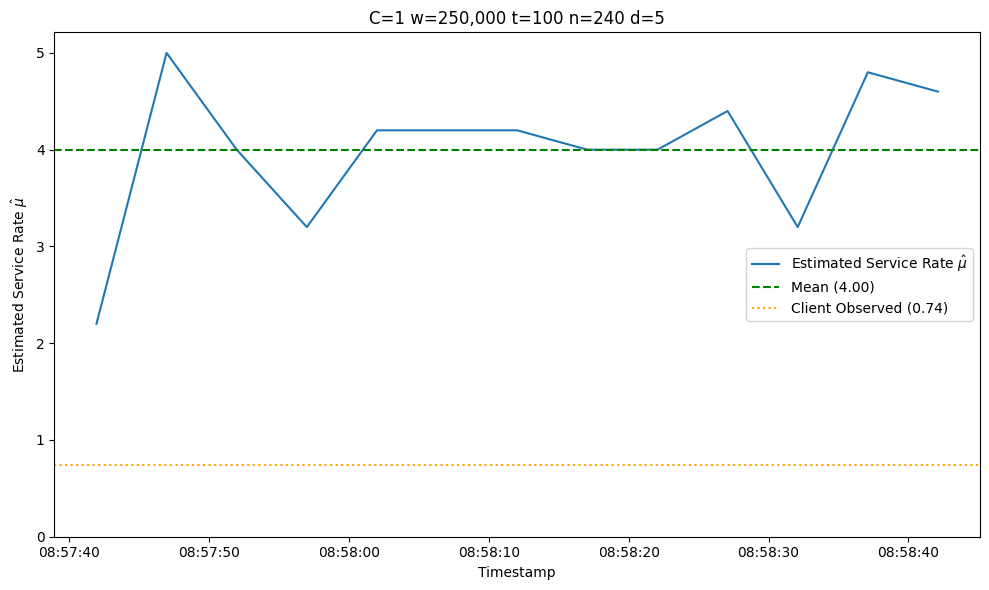

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(mu_hat, label=r'Estimated Service Rate $\hat{\mu}$')
plt.axhline(y=mean_mu_hat, color='green', linestyle='--', label=f'Mean ({mean_mu_hat:.2f})')
plt.axhline(y=per_req_mean, color='orange', linestyle=':', label=f'Client Observed ({per_req_mean:.2f})')
plt.ylim((0,None))
plt.xlabel('Timestamp')
plt.ylabel(r'Estimated Service Rate $\hat{\mu}$')
plt.title(title_from_exp_str(exp_str))
plt.legend()
plt.tight_layout()